### Instalando Bibliotecas ###

In [3]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

### Importando Bibliotecas ###

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
import plotly.io as pio
pio.renderers.default = "iframe"

### Ignorando avisos ###

In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Definir Função de Gráfico ###

In [7]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

# Pergunta 1: Use yfinance para extrair dados de ações #

### Criar o objeto Ticker para a Tesla ###

In [8]:
tesla = yf.Ticker('TSLA')

### Extrair informações históricas das ações da Tesla ###

In [9]:
tesla_data = tesla.history(period="max")

### Resetar o índice ###

In [10]:
tesla_data.reset_index(inplace=True)

### Exibir os primeiros 5 registros para confirmar ###

In [11]:
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


# Pergunta 2: Use Web Scraping para extrair dados de receita da Tesla #

### Baixando a biblioteca requests ###

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### Defininfo a URL ###

In [13]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

### Baixar a página da web ###

In [14]:
response = requests.get(url)

### Salvar o texto da resposta em uma variável ###

In [15]:
html_data = response.text

### Parsear o HTML usando BeautifulSoup com o parser html.parser ###

In [16]:
soup = BeautifulSoup(html_data, 'html.parser')

### Encontrar a tabela ###

In [17]:
table_body = soup.find_all("tbody")[1]

In [18]:
rows = table_body.find_all("tr")

In [19]:
data = []
for row in rows:
    cols = row.find_all("td")
    data.append({
        "Column1": cols[0].text.strip(),
        "Column2": cols[1].text.strip(),    })

In [20]:
tesla_revenue = pd.DataFrame(data)

### Exibir os primeiros 5 registros para confirmação ###

In [21]:
print(tesla_revenue.head())

      Column1  Column2
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


### exibir as últimas 5 linhas do DataFrame tesla_revenue usando a função tail. ###

In [23]:
print(tesla_revenue.tail())

       Column1 Column2
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31        
52  2009-09-30     $46
53  2009-06-30     $27


# Pergunta 3: Use yfinance para extrair dados de ações #

### Baixando biblioteca ###

In [24]:
import yfinance as yf
import pandas as pd

### Criar o objeto Ticker para a GameStop ###

In [25]:
gamestop = yf.Ticker('GME')

### Extrair informações históricas das ações da GameStop ###

In [26]:
gme_data = gamestop.history(period="max")

### Resetar o índice para garantir que a coluna de datas seja incluída como coluna ###

In [27]:
gme_data.reset_index(inplace=True)

### Exibir os primeiros 5 registros ###

In [28]:
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670627  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# Pergunta 4: Use Webscraping para extrair dados de receita do GME #

### Bibliotecas ###

In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### URL ###

In [30]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

### Baixar web e salvar ###

In [31]:
response = requests.get(url)
html_data_2 = response.text

### Parsear o HTML usando BeautifulSoup com o parser html.parser ###

In [32]:
soup = BeautifulSoup(html_data_2, 'html.parser')

### Encontrar o corpo da tabela específico (index 1) ###

In [33]:
table_body = soup.find_all("tbody")[1]

### Criar um DataFrame vazio ###

In [34]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

### Iterar pelas linhas no corpo da tabela ###

In [35]:
for row in table_body.find_all('tr'):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[cols[0], cols[1]]], columns=['Date', 'Revenue'])], ignore_index=True)

### Remover sinais de dólar e vírgulas da coluna Revenue ###

In [36]:
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)

### Exibir os primeiros 5 registros para confirmação ###

In [37]:
print(gme_revenue.head())

         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


### # Exibir os últimos 5 registros ###

In [38]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


# Pergunta 5: Plotar gráfico de ações da Tesla #

In [44]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 127.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 135.8 MB/s eta 0:00:00


In [47]:
import matplotlib.pyplot as plt

In [51]:
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label='Stock Price')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red', label='Revenue')
    ax2.tick_params(axis='y')

    fig.tight_layout()
    plt.title(title)
    plt.show()   

KeyError: 'Date'

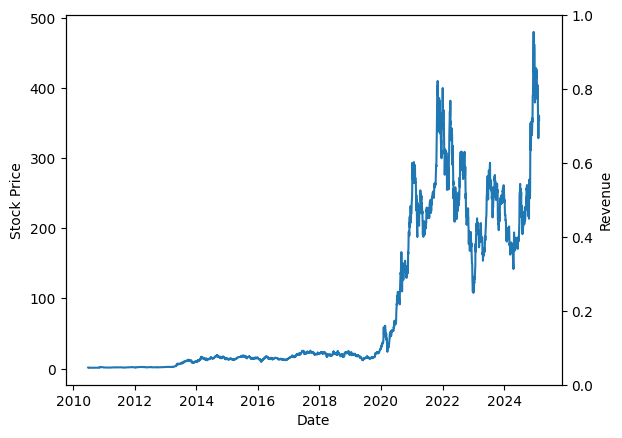

In [53]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

# Pergunta 6: Plotar gráfico de ações da GameStop #

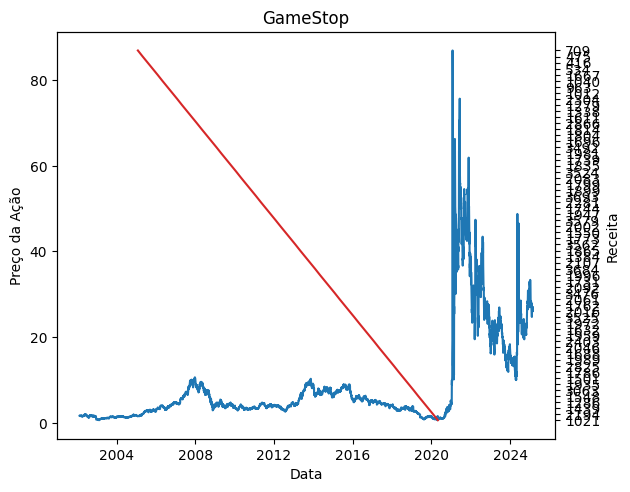

In [56]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Data')
    ax1.set_ylabel('Preço da Ação')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label='Preço da Ação')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Receita')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red', label='Receita')
    ax2.tick_params(axis='y')

    fig.tight_layout()
    plt.title(title)
    plt.show()

gme_data.rename(columns={'Nome_Original_Coluna_Data': 'Date'}, inplace=True)
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

gme_revenue.rename(columns={'Nome_Original_Coluna_Data': 'Date'}, inplace=True)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

make_graph(gme_data, gme_revenue, 'GameStop')
